In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

In [11]:
import keras

In [12]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')
print("All Set!")

All Set!


In [13]:
print(f"Training data size is {train_data.shape}\nTesting data size is {test_data.shape}")
#in train data, one of the dimension is the class labels, which is why there are 785 dimiension rather than 784

Training data size is (25815, 785)
Testing data size is (26424, 784)


### Set data features and labels



In [14]:
X = train_data.drop(['label'], 1).values
y = train_data['label'].values

test_val = test_data.values

### Normalization

In [15]:
X = X / 255.0
test_val = test_val / 255.0

### Reshape

In [16]:
# Reshapeing the image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 whih is for gray scale
X = X.reshape(-1,28,28,1)
test_val = test_val.reshape(-1,28,28,1)

### One-Hot Encoding the Labels


In [17]:
y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (25815, 10)


### Splitting the data into Train and Validation sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((23233, 28, 28, 1), (2582, 28, 28, 1), (23233, 10), (2582, 10))

In [20]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

In [28]:
epochs = 4
batch_size = 128

CNN Model

In [ ]:
model=Sequential()

model.add(Conv2D(filters=64, 
                 kernel_size = (3,3), 
                 activation="relu", 
                 input_shape=(28,28,1)))

model.add(Conv2D(filters=64, 
                 kernel_size = (3,3), 
                 activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, 
                 kernel_size = (3,3), 
                 activation="relu"))
model.add(Conv2D(filters=128, 
                 kernel_size = (3,3), 
                 activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), 
                 activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [23]:
#creating more data as the data in the dataset in limited

datagenerator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagenerator.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagenerator.flow(X_test, y_test, batch_size=batch_size)

Training the model

In [ ]:
history = model.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/20
295/295 [==============================] - 303s 1s/step - loss: 0.1567 - accuracy: 0.9511 - val_loss: 1.8796 - val_accuracy: 0.4001
Epoch 2/20
295/295 [==============================] - 301s 1s/step - loss: 0.0608 - accuracy: 0.9803 - val_loss: 0.0779 - val_accuracy: 0.9746
Epoch 3/20
295/295 [==============================] - 303s 1s/step - loss: 0.0463 - accuracy: 0.9860 - val_loss: 0.0630 - val_accuracy: 0.9795
Epoch 4/20
295/295 [==============================] - 301s 1s/step - loss: 0.0438 - accuracy: 0.9872 - val_loss: 0.0480 - val_accuracy: 0.9844
Epoch 5/20
295/295 [==============================] - 302s 1s/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0541 - val_accuracy: 0.9844
Epoch 6/20
295/295 [==============================] - 306s 1s/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0683 - val_accuracy: 0.9807
Epoch 7/20
295/295 [==============================] - 307s 1s/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0575 - val_accuracy: 0.9851

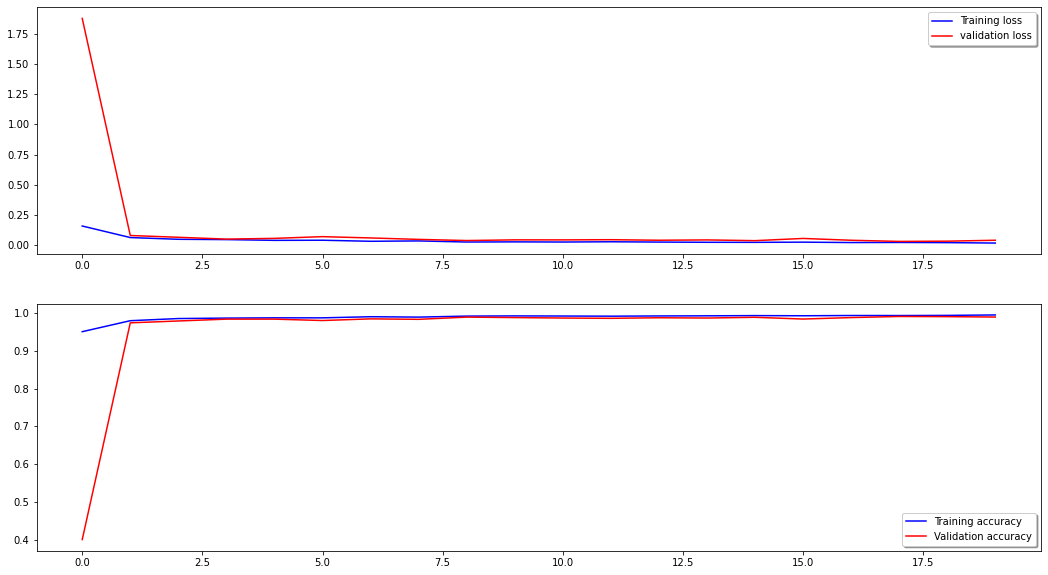

In [ ]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Loss Function :categorical_crossentropy


In [29]:
model_loss1=Sequential()

model_loss1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_loss1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_loss1.add(MaxPooling2D(pool_size=(2,2)))
model_loss1.add(BatchNormalization())
model_loss1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_loss1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_loss1.add(MaxPooling2D(pool_size=(2,2)))
model_loss1.add(BatchNormalization())    
model_loss1.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_loss1.add(MaxPooling2D(pool_size=(2,2)))
    
model_loss1.add(Flatten())
model_loss1.add(BatchNormalization())
model_loss1.add(Dense(512,activation="relu"))
    
model_loss1.add(Dense(10,activation="softmax"))
    
model_loss1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
history = model_loss1.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 180s 991ms/step - loss: 0.1894 - accuracy: 0.9416 - val_loss: nan - val_accuracy: 0.3344
Epoch 2/4
181/181 [==============================] - 179s 990ms/step - loss: 0.0753 - accuracy: 0.9757 - val_loss: nan - val_accuracy: 0.8441
Epoch 3/4
181/181 [==============================] - 179s 990ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: nan - val_accuracy: 0.9605
Epoch 4/4
181/181 [==============================] - 179s 990ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.0782 - val_accuracy: 0.9777


Loss function: Mean square error




In [32]:
model_loss2=Sequential()

model_loss2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_loss2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_loss2.add(MaxPooling2D(pool_size=(2,2)))
model_loss2.add(BatchNormalization())
model_loss2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_loss2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_loss2.add(MaxPooling2D(pool_size=(2,2)))
model_loss2.add(BatchNormalization())    
model_loss2.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_loss2.add(MaxPooling2D(pool_size=(2,2)))
    
model_loss2.add(Flatten())
model_loss2.add(BatchNormalization())
model_loss2.add(Dense(512,activation="relu"))
    
model_loss2.add(Dense(10,activation="softmax"))
    
model_loss2.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])

In [33]:
history_loss2 = model_loss2.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 181s 996ms/step - loss: 0.0103 - accuracy: 0.9290 - val_loss: nan - val_accuracy: 0.2086
Epoch 2/4
181/181 [==============================] - 180s 992ms/step - loss: 0.0042 - accuracy: 0.9734 - val_loss: 0.0203 - val_accuracy: 0.9008
Epoch 3/4
181/181 [==============================] - 182s 1s/step - loss: 0.0034 - accuracy: 0.9780 - val_loss: nan - val_accuracy: 0.9582
Epoch 4/4
181/181 [==============================] - 182s 1s/step - loss: 0.0032 - accuracy: 0.9802 - val_loss: nan - val_accuracy: 0.9711


Loss function: Huber



In [38]:
model_loss3=Sequential()

model_loss3.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_loss3.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_loss3.add(MaxPooling2D(pool_size=(2,2)))
model_loss3.add(BatchNormalization())
model_loss3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_loss3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_loss3.add(MaxPooling2D(pool_size=(2,2)))
model_loss3.add(BatchNormalization())    
model_loss3.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_loss3.add(MaxPooling2D(pool_size=(2,2)))
    
model_loss3.add(Flatten())
model_loss3.add(BatchNormalization())
model_loss3.add(Dense(512,activation="relu"))
    
model_loss3.add(Dense(10,activation="softmax"))
    
model_loss3.compile(loss="Huber", optimizer="adam", metrics=["accuracy"])

In [39]:
history_loss3 = model_loss3.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 181s 993ms/step - loss: 0.0053 - accuracy: 0.9269 - val_loss: nan - val_accuracy: 0.2754
Epoch 2/4
181/181 [==============================] - 180s 992ms/step - loss: 0.0024 - accuracy: 0.9692 - val_loss: nan - val_accuracy: 0.8633
Epoch 3/4
181/181 [==============================] - 183s 1s/step - loss: 0.0019 - accuracy: 0.9760 - val_loss: nan - val_accuracy: 0.9727
Epoch 4/4
181/181 [==============================] - 185s 1s/step - loss: 0.0016 - accuracy: 0.9797 - val_loss: 0.0017 - val_accuracy: 0.9758


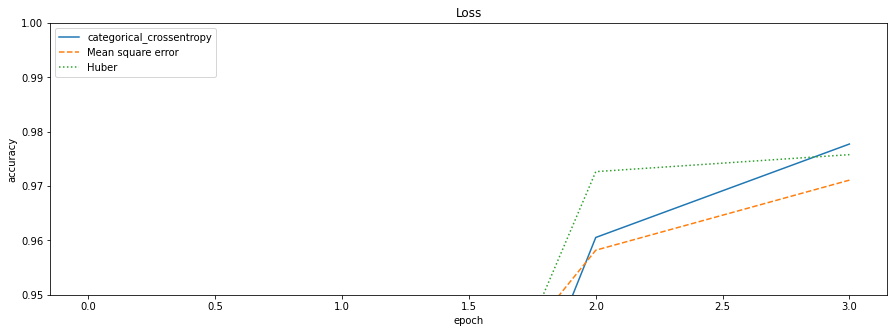

In [72]:
# PLOT Losses
history_loss =[history, history_loss2, history_loss3 ]
names_loss=['categorical_crossentropy','Mean square error','Huber']
plt.figure(figsize=(15,5))
styles = ['-', '--', ':', '-.']
for i in range(3):
    plt.plot(history_loss[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names_loss, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1])
plt.show()

Optimizers

In [46]:
model_opt1=Sequential()

model_opt1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_opt1.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_opt1.add(MaxPooling2D(pool_size=(2,2)))
model_opt1.add(BatchNormalization())
model_opt1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_opt1.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_opt1.add(MaxPooling2D(pool_size=(2,2)))
model_opt1.add(BatchNormalization())    
model_opt1.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_opt1.add(MaxPooling2D(pool_size=(2,2)))
    
model_opt1.add(Flatten())
model_opt1.add(BatchNormalization())
model_opt1.add(Dense(512,activation="relu"))
    
model_opt1.add(Dense(10,activation="softmax"))
    
model_opt1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [47]:
history_opt1 = model_opt1.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 181s 995ms/step - loss: 0.2118 - accuracy: 0.9339 - val_loss: nan - val_accuracy: 0.0926
Epoch 2/4
181/181 [==============================] - 180s 993ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.6524 - val_accuracy: 0.7727
Epoch 3/4
181/181 [==============================] - 180s 996ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0933 - val_accuracy: 0.9750
Epoch 4/4
181/181 [==============================] - 181s 1000ms/step - loss: 0.0481 - accuracy: 0.9850 - val_loss: 0.0694 - val_accuracy: 0.9785


In [50]:
model_opt2=Sequential()

model_opt2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_opt2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_opt2.add(MaxPooling2D(pool_size=(2,2)))
model_opt2.add(BatchNormalization())
model_opt2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_opt2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_opt2.add(MaxPooling2D(pool_size=(2,2)))
model_opt2.add(BatchNormalization())    
model_opt2.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_opt2.add(MaxPooling2D(pool_size=(2,2)))
    
model_opt2.add(Flatten())
model_opt2.add(BatchNormalization())
model_opt2.add(Dense(512,activation="relu"))
    
model_opt2.add(Dense(10,activation="softmax"))
    
model_opt2.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

In [51]:
history_opt2 = model_opt2.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 181s 995ms/step - loss: 0.5441 - accuracy: 0.8601 - val_loss: nan - val_accuracy: 0.1141
Epoch 2/4
181/181 [==============================] - 180s 994ms/step - loss: 0.1982 - accuracy: 0.9498 - val_loss: 2.0554 - val_accuracy: 0.2492
Epoch 3/4
181/181 [==============================] - 182s 1s/step - loss: 0.1416 - accuracy: 0.9631 - val_loss: nan - val_accuracy: 0.8984
Epoch 4/4
181/181 [==============================] - 181s 1s/step - loss: 0.1123 - accuracy: 0.9706 - val_loss: 0.1623 - val_accuracy: 0.9602


In [52]:
model_opt3=Sequential()

model_opt3.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model_opt3.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model_opt3.add(MaxPooling2D(pool_size=(2,2)))
model_opt3.add(BatchNormalization())
model_opt3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model_opt3.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model_opt3.add(MaxPooling2D(pool_size=(2,2)))
model_opt3.add(BatchNormalization())    
model_opt3.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model_opt3.add(MaxPooling2D(pool_size=(2,2)))
    
model_opt3.add(Flatten())
model_opt3.add(BatchNormalization())
model_opt3.add(Dense(512,activation="relu"))
    
model_opt3.add(Dense(10,activation="softmax"))
    
model_opt3.compile(loss="categorical_crossentropy", optimizer="RMSprop", metrics=["accuracy"])

In [53]:
history_opt3 = model_opt3.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 190s 1s/step - loss: 0.2154 - accuracy: 0.9321 - val_loss: nan - val_accuracy: 0.1195
Epoch 2/4
181/181 [==============================] - 187s 1s/step - loss: 0.0848 - accuracy: 0.9731 - val_loss: nan - val_accuracy: 0.3695
Epoch 3/4
181/181 [==============================] - 184s 1s/step - loss: 0.0674 - accuracy: 0.9797 - val_loss: nan - val_accuracy: 0.9660
Epoch 4/4
181/181 [==============================] - 183s 1s/step - loss: 0.0532 - accuracy: 0.9849 - val_loss: nan - val_accuracy: 0.9672


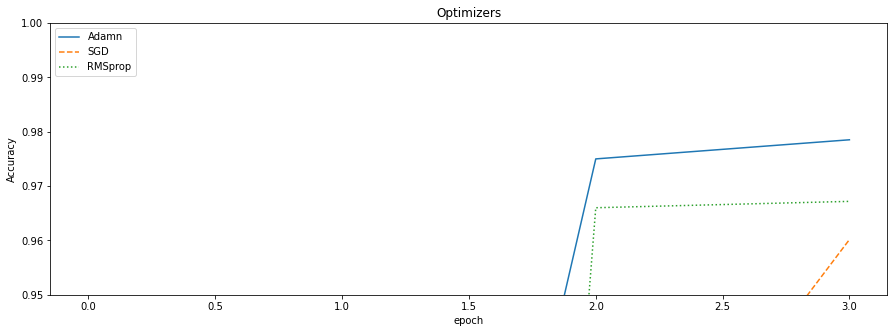

In [73]:
# PLOT Losses
history_opt =[history_opt1, history_opt2, history_opt3 ]
names_opt=['Adamn','SGD','RMSprop']
plt.figure(figsize=(15,5))
styles = ['-', '--', ':', '-.']
for i in range(3):
    plt.plot(history_opt[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Optimizers')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(names_opt, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.95,1])
plt.show()

Model 1- Lenet

In [60]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])
lenet_5_model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [61]:
history_1 = lenet_5_model.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 23s 120ms/step - loss: 1.0940 - accuracy: 0.6538 - val_loss: nan - val_accuracy: 0.7977
Epoch 2/4
181/181 [==============================] - 19s 105ms/step - loss: 0.4887 - accuracy: 0.8551 - val_loss: nan - val_accuracy: 0.8895
Epoch 3/4
181/181 [==============================] - 19s 105ms/step - loss: 0.2986 - accuracy: 0.9120 - val_loss: nan - val_accuracy: 0.9242
Epoch 4/4
181/181 [==============================] - 19s 107ms/step - loss: 0.2208 - accuracy: 0.9321 - val_loss: nan - val_accuracy: 0.9395


In [64]:
model2=Sequential()

model2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model2.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model2.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())    
model2.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model2.add(MaxPooling2D(pool_size=(2,2)))
    
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(512,activation="relu"))
    
model2.add(Dense(10,activation="softmax"))
    
model2.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [65]:
history_2 = model2.fit(train_gen, 
                              epochs = epochs, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)


Epoch 1/4
181/181 [==============================] - 184s 1s/step - loss: 0.2027 - accuracy: 0.9363 - val_loss: nan - val_accuracy: 0.1152
Epoch 2/4
181/181 [==============================] - 184s 1s/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: nan - val_accuracy: 0.5539
Epoch 3/4
181/181 [==============================] - 183s 1s/step - loss: 0.0592 - accuracy: 0.9810 - val_loss: 0.0785 - val_accuracy: 0.9758
Epoch 4/4
181/181 [==============================] - 182s 1s/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: nan - val_accuracy: 0.9852


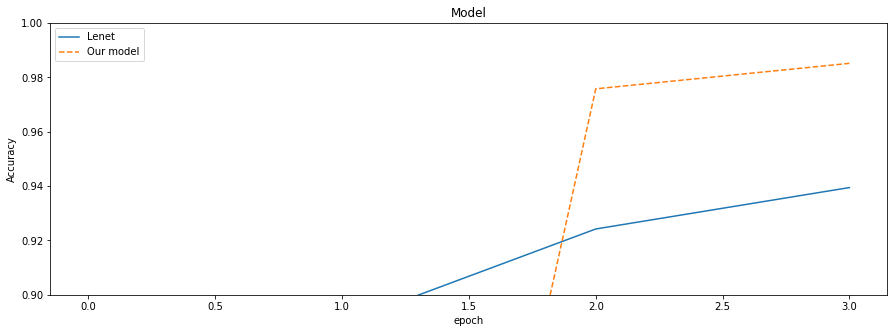

In [74]:
# PLOT Losses
history_mod =[history_1, history_2]
names_opt=['Lenet','Our model']
plt.figure(figsize=(15,5))
styles = ['-', '--', ':', '-.']
for i in range(2):
    plt.plot(history_mod[i].history['val_accuracy'],linestyle=styles[i])
plt.title('Model')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(names_opt, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.90,1])
plt.show()